# Poverty Status and Urban Rural population Distribution

The purpose of this project is to access US Census data around poverty rates and the distribution of population in urban and rural areas. The goal for this particular project is to simply access and organize the data so that it can be visualized and to create a data dictionary to define and clarify what data is included in the final dataset.

In [10]:
# Import modules
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import chardet
from census import Census
from us import states
import os

In [11]:
#Census API Key goes here. Key can be obtained for free here: https://api.census.gov/data/key_signup.html
c = Census("8526db1553e33e1c7296bf58816d7179f90e7574")

## 1. Urban and Rural Geographies

Data description from US Census (https://www.census.gov/programs-surveys/geography/guidance/geo-areas/urban-rural.html)

The Census Bureau’s urban-rural classification is a delineation of geographic areas, identifying both individual urban areas and the rural area of the nation. The Census Bureau’s urban areas represent densely developed territory, and encompass residential, commercial, and other non-residential urban land uses. The Census Bureau delineates urban areas after each decennial census by applying specified criteria to decennial census and other data. Rural encompasses all population, housing, and territory not included within an urban area.

For the 2020 Census, an urban area will comprise a densely settled core of census blocks that meet minimum housing unit density and/or population density requirements. This includes adjacent territory containing non-residential urban land uses. To qualify as an urban area, the territory identified according to criteria must encompass at least 2,000 housing units or have a population of at least 5,000.

The most granular dataset available for the urban rural Census data was the file imported below which is broken down by county. 

In [12]:

with open('2020_UA_COUNTY.csv', 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large


urban_2020 = pd.read_csv('2020_UA_COUNTY.csv', encoding=result['encoding'])

print(urban_2020.shape)
urban_2020.head()

C:\Users\pvste\AppData\Local\Temp\ipykernel_5368\4034267880.py:5: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,30) have mixed types. Specify dtype option on import or set low_memory=False.
  urban_2020 = pd.read_csv('2020_UA_COUNTY.csv', encoding=result['encoding'])


(1045372, 33)


,STATE,COUNTY,STATE_NAME,COUNTY_NAME,POP_COU,HOU_COU,ALAND_COU,ALAND_Mi²_COU,POPDEN_COU,HOUDEN_COU,...,HOU_RUR,HOUPCT_RUR,ALAND_RUR,ALAND_Mi²_RUR,ALAND_PCT_RUR,POPDEN_RUR,HOUDEN_RUR,RURALBLOCKS,Unnamed: 31,Unnamed: 32
0,1.0,1.0,Alabama,Autauga,"58,805","24,350","1,539,634,184",594.45,98.92,40.96,...,"9,991",41.03%,"1,483,727,020",572.87,96.37%,41.75,17.44,991,NaN,NaN
1,1.0,3.0,Alabama,Baldwin,"231,767","124,148","4,117,656,199","1,589.83",145.78,78.09,...,"40,740",32.82%,"3,762,600,021","1,452.74",91.38%,59.96,28.04,"3,181",NaN,NaN
2,1.0,5.0,Alabama,Barbour,"25,223","11,618","2,292,160,149",885.00,28.50,13.13,...,"7,538",64.88%,"2,276,027,730",878.77,99.30%,18.92,8.58,"1,011",NaN,NaN
3,1.0,7.0,Alabama,Bibb,"22,293","9,002","1,612,188,717",622.47,35.81,14.46,...,"9,002",100.00%,"1,612,188,717",622.47,100.00%,35.81,14.46,"1,090",NaN,NaN
4,1.0,9.0,Alabama,Blount,"59,134","24,622","1,670,259,090",644.89,91.70,38.18,...,"22,337",90.72%,"1,658,933,117",640.51,99.32%,83.54,34.87,"2,207",NaN,NaN


The dataset contains 33 columns and uses the FIPS code to identify the County and State. For this particular project we are interested in using basic population data and information about the rural/ urban makeup of each county. Here are the rows we will use:
1. STATE : Two Digit State Code
2. COUNTY : Three digit County Code
3. STATE_NAME : Name of The State
4. COUNTY_NAME : Name of The County
5. POP_COU : 2020 Census total population of the County
6. POPDEN_COU : 2020 population density of the County (square miles)
7. POP_URB : 2020 Census population of the County within Urban blocks
8. POPPCT_URB : Percent of the 2020 Census population of the County within Urban blocks
9. POP_RUR : 2020 Census population of the County within Rural blocks
10. POPPCT_RUR : Percent of the 2020 Census population in the County within Rural blocks

In [13]:
urban_2020 = urban_2020[['STATE','COUNTY','STATE_NAME','COUNTY_NAME','POP_COU','POPDEN_COU','POP_URB','POPPCT_URB','POP_RUR','POPPCT_RUR']]
urban_2020.shape

(1045372, 10)

In [14]:
#data distionary template:

# Customize for data in this project
columns = urban_2020.columns
data_types = urban_2020.dtypes
descriptions = columns
description_lst = [' Two Digit State Code',
                   ' Three digit County Code',
                   ' Name of The State',
                   ' Name of The County',
                   ' 2020 Census total population of the County',
                   ' 2020 population density of the County (square miles)',
                   ' 2020 Census population of the County within Urban blocks',
                   ' Percent of the 2020 Census population of the County within Urban blocks',
                   ' 2020 Census population of the County within Rural blocks',
                   ' Percent of the 2020 Census population in the County within Rural blocks']

descriptions = list(map(str.__add__, descriptions, description_lst))

def generate_data_dictionary(column_names, descriptions, data_types):
    data_dictionary = {}

    for column, desc, data_type in zip(column_names, descriptions, data_types):
        data_dictionary[column] = {
            'Description': desc,
            'DataType': data_type,

        }

    return data_dictionary

data_dictionary = generate_data_dictionary(columns, descriptions, data_types)
urban_rural_dict = data_dictionary
urban_rural_dict

{'STATE': {'Description': 'STATE Two Digit State Code',
  'DataType': dtype('float64')},
 'COUNTY': {'Description': 'COUNTY Three digit County Code',
  'DataType': dtype('float64')},
 'STATE_NAME': {'Description': 'STATE_NAME Name of The State',
  'DataType': dtype('O')},
 'COUNTY_NAME': {'Description': 'COUNTY_NAME Name of The County',
  'DataType': dtype('O')},
 'POP_COU': {'Description': 'POP_COU 2020 Census total population of the County',
  'DataType': dtype('O')},
 'POPDEN_COU': {'Description': 'POPDEN_COU 2020 population density of the County (square miles)',
  'DataType': dtype('O')},
 'POP_URB': {'Description': 'POP_URB 2020 Census population of the County within Urban blocks',
  'DataType': dtype('O')},
 'POPPCT_URB': {'Description': 'POPPCT_URB Percent of the 2020 Census population of the County within Urban blocks',
  'DataType': dtype('O')},
 'POP_RUR': {'Description': 'POP_RUR 2020 Census population of the County within Rural blocks',
  'DataType': dtype('O')},
 'POPPCT_R

In [15]:
urban_2020.to_csv(r'./sel_urban_2020.csv', index = False)
urban_rural_df = pd.DataFrame.from_dict(urban_rural_dict) 
urban_rural_df.to_csv(r'./urban_rural_dd.csv', index = False)

## 2. Poverty Level

We can find poverty level data using the API for the American Community Survey of the US Census. Below we will draw from 2 columns that measure poverty by taking a count of the income to poverty ratio for the given area. An explaination of how the income to poverty ratio is calculated is here: https://www.census.gov/topics/income-poverty/poverty/guidance/poverty-measures.html but to summarize, this is the measure of the houshold income divided by the poverty threashold for that area. So a family that is right at the poverty line would be 1.0 and one that is making 50% of the poverty rate is .50 and so on. So when we count the ratio we are able to explain the overall level of poverty for the population in that area. The columns are divided between the count with ratio less than .5 and the count with ration between .5 and .99 so if we combine those columns and divide by the total population we have the poverty rate.

Below we will use the census python library which impliments the US Cencus API to access the required data from the ACS. We will use ACS5 to indicat we want the 5 year estimates and we will ask for 2021 as the year. We then put the data into a data frame and format per our needs.

In [16]:
# Below code modified from https://pygis.io/docs/d_access_census.html
# Obtain Census variables from the 2019 ACS at the tract level for the state of Indiana (FIPS code: 18)
# C17002_001E: count of ratio of income to poverty in the past 12 months (total)
# C17002_002E: count of ratio of income to poverty in the past 12 months (< 0.50)
# C17002_003E: count of ratio of income to poverty in the past 12 months (0.50 - 0.99)
# B01003_001E: total population
# Sources: https://api.census.gov/data/2019/acs/acs5/variables.html; https://pypi.org/project/census/
IN_census = c.acs5.state_county_tract(fields = ('NAME', 'C17002_001E', 'C17002_002E', 'C17002_003E', 'B01003_001E'),
                                      state_fips = states.IN.fips,
                                      county_fips = "*",
                                      tract = "*",
                                      year = 2021)

In [17]:
# Create a dataframe from the census data
IN_df = pd.DataFrame(IN_census)

# Show the dataframe
print(IN_df.head(2))
print('Shape: ', IN_df.shape)

                                      NAME  C17002_001E  C17002_002E  \
0  Census Tract 301, Adams County, Indiana       4826.0        117.0   
1  Census Tract 302, Adams County, Indiana       4438.0        379.0   

   C17002_003E  B01003_001E state county   tract  
0         85.0       4826.0    18    001  030100  
1        585.0       4652.0    18    001  030200  
Shape:  (1696, 8)


The next step is to get the shapefile that we need to map the data. The variable in_tract is found on the referenced census page and is specific to Indiana, so this must be changed to find other states.

In [18]:
# Access shapefile of Indiana census tracts
# "https://www2.census.gov/geo/tiger/TIGER_RD18/STATE/18_INDIANA
in_tract = gpd.read_file("https://www2.census.gov/geo/tiger/GENZ2022/shp/cb_2022_18_tract_500k.zip")

epsg_code = in_tract.crs.to_epsg()
print(epsg_code)
# Reproject shapefile to UTM Zone 17N
# https://spatialreference.org/ref/epsg/wgs-84-utm-zone-17n/
in_tract = in_tract.to_crs(epsg = 4269)

# Print GeoDataFrame of shapefile
print(in_tract.head(2))
print('Shape: ', in_tract.shape)

# Check shapefile projection
print("\nThe shapefile projection is: {}".format(in_tract.crs))

4269
  STATEFP COUNTYFP TRACTCE              AFFGEOID        GEOID    NAME  \
0      18      003  011501  1400000US18003011501  18003011501  115.01   
1      18      003  011202  1400000US18003011202  18003011202  112.02   

              NAMELSAD STUSPS    NAMELSADCO STATE_NAME LSAD    ALAND  AWATER  \
0  Census Tract 115.01     IN  Allen County    Indiana   CT  9953588   48686   
1  Census Tract 112.02     IN  Allen County    Indiana   CT  7845095       0   

                                            geometry  
0  POLYGON ((-85.22659 41.05981, -85.22657 41.074...  
1  POLYGON ((-85.05878 41.06952, -85.04239 41.069...  
Shape:  (1693, 14)

The shapefile projection is: EPSG:4269


In [19]:
# Combine state, county, and tract columns together to create a new string and assign to new column
IN_df["GEOID"] = IN_df["state"] + IN_df["county"] + IN_df["tract"]
IN_df.head()

,NAME,C17002_001E,C17002_002E,C17002_003E,B01003_001E,state,county,tract,GEOID
0,"Census Tract 301, Adams County, Indiana",4826.0,117.0,85.0,4826.0,18,001,030100,18001030100
1,"Census Tract 302, Adams County, Indiana",4438.0,379.0,585.0,4652.0,18,001,030200,18001030200
2,"Census Tract 303, Adams County, Indiana",5117.0,161.0,481.0,5408.0,18,001,030300,18001030300
3,"Census Tract 304, Adams County, Indiana",4063.0,61.0,295.0,4063.0,18,001,030400,18001030400
4,"Census Tract 305, Adams County, Indiana",6783.0,311.0,810.0,6789.0,18,001,030500,18001030500


In [20]:

IN_df = IN_df.drop(columns = ["state", "county", "tract"])
IN_df.head(2)

,NAME,C17002_001E,C17002_002E,C17002_003E,B01003_001E,GEOID
0,"Census Tract 301, Adams County, Indiana",4826.0,117.0,85.0,4826.0,18001030100
1,"Census Tract 302, Adams County, Indiana",4438.0,379.0,585.0,4652.0,18001030200


In [21]:
# Check column data types for census data
print("Column data types for census data:\n{}".format(IN_df.dtypes))

# Check column data types for census shapefile
print("\nColumn data types for census shapefile:\n{}".format(in_tract.dtypes))

# Source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html

Column data types for census data:
NAME            object
C17002_001E    float64
C17002_002E    float64
C17002_003E    float64
B01003_001E    float64
GEOID           object
dtype: object

Column data types for census shapefile:
STATEFP         object
COUNTYFP        object
TRACTCE         object
AFFGEOID        object
GEOID           object
NAME            object
NAMELSAD        object
STUSPS          object
NAMELSADCO      object
STATE_NAME      object
LSAD            object
ALAND            int64
AWATER           int64
geometry      geometry
dtype: object


The next step is to merge the shapfile data with the Census data.

In [22]:
# Join the attributes of the dataframes together
# Source: https://geopandas.org/docs/user_guide/mergingdata.html
in_merge = in_tract.merge(IN_df, on = "GEOID")

# Show result
print(in_merge.head(2))
print('Shape: ', in_merge.shape)

  STATEFP COUNTYFP TRACTCE              AFFGEOID        GEOID  NAME_x  \
0      18      003  011501  1400000US18003011501  18003011501  115.01   
1      18      003  011202  1400000US18003011202  18003011202  112.02   

              NAMELSAD STUSPS    NAMELSADCO STATE_NAME LSAD    ALAND  AWATER  \
0  Census Tract 115.01     IN  Allen County    Indiana   CT  9953588   48686   
1  Census Tract 112.02     IN  Allen County    Indiana   CT  7845095       0   

                                            geometry  \
0  POLYGON ((-85.22659 41.05981, -85.22657 41.074...   
1  POLYGON ((-85.05878 41.06952, -85.04239 41.069...   

                                       NAME_y  C17002_001E  C17002_002E  \
0  Census Tract 115.01, Allen County, Indiana       3625.0        558.0   
1  Census Tract 112.02, Allen County, Indiana       3097.0         65.0   

   C17002_003E  B01003_001E  
0        196.0       3648.0  
1        112.0       3110.0  
Shape:  (1693, 19)


In [23]:
# Create new dataframe from select columns
in_poverty_tract = in_merge[["STATEFP", "COUNTYFP", "TRACTCE", "GEOID", "geometry", "C17002_001E", "C17002_002E", "C17002_003E", "B01003_001E"]]

# Show dataframe
print(in_poverty_tract.head(2))
print('Shape: ', in_poverty_tract.shape)

  STATEFP COUNTYFP TRACTCE        GEOID  \
0      18      003  011501  18003011501   
1      18      003  011202  18003011202   

                                            geometry  C17002_001E  \
0  POLYGON ((-85.22659 41.05981, -85.22657 41.074...       3625.0   
1  POLYGON ((-85.05878 41.06952, -85.04239 41.069...       3097.0   

   C17002_002E  C17002_003E  B01003_001E  
0        558.0        196.0       3648.0  
1         65.0        112.0       3110.0  
Shape:  (1693, 9)


Next we will disolve the census tract data by county so we can display it this way in the map. We are essentially suming all the tract data within each county to unify the data.

In [24]:
# Dissolve and group the census tracts within each county and aggregate all the values together
# Source: https://geopandas.org/docs/user_guide/aggregation_with_dissolve.html
in_poverty_county = in_poverty_tract.dissolve(by = 'COUNTYFP', aggfunc = 'sum')

# Show dataframe
print(in_poverty_county.head(2))
print('Shape: ', in_poverty_county.shape)

C:\Users\pvste\AppData\Local\Temp\ipykernel_5368\1814701109.py:3: FutureWarning: The default value of numeric_only in aggfunc='sum' within pandas.DataFrameGroupBy.agg used in dissolve is deprecated. In pandas 2.0, numeric_only will default to False. Either specify numeric_only as additional argument in dissolve() or select only columns which should be valid for the function.
  in_poverty_county = in_poverty_tract.dissolve(by = 'COUNTYFP', aggfunc = 'sum')


                                                   geometry  C17002_001E  \
COUNTYFP                                                                   
001       POLYGON ((-84.80218 40.65755, -84.80214 40.644...      34933.0   
003       POLYGON ((-85.22339 40.91698, -85.27018 40.917...     375492.0   

          C17002_002E  C17002_003E  B01003_001E  
COUNTYFP                                         
001            2297.0       3057.0      35685.0  
003           19334.0      27019.0     381839.0  
Shape:  (92, 5)


In [25]:
# Get poverty rate and store values in new column
in_poverty_county["Poverty_Rate"] = (in_poverty_county["C17002_002E"] + in_poverty_county["C17002_003E"]) / in_poverty_county["B01003_001E"] * 100

# Show dataframe
in_poverty_county.head(2)

,geometry,C17002_001E,C17002_002E,C17002_003E,B01003_001E,Poverty_Rate
COUNTYFP,,,,,,
001,"POLYGON ((-84.80218 40.65755, -84.80214 40.644...",34933.0,2297.0,3057.0,35685.0,15.003503
003,"POLYGON ((-85.22339 40.91698, -85.27018 40.917...",375492.0,19334.0,27019.0,381839.0,12.139410


Below we will visualize the data with a map. The first cell is using matplotlib and the second uses plotly. I decided to leave in both options for reproducibility but the plotly map has more advanced features and interactivity.

Text(0.5, 1.0, 'Poverty Rates (%) in Indiana')

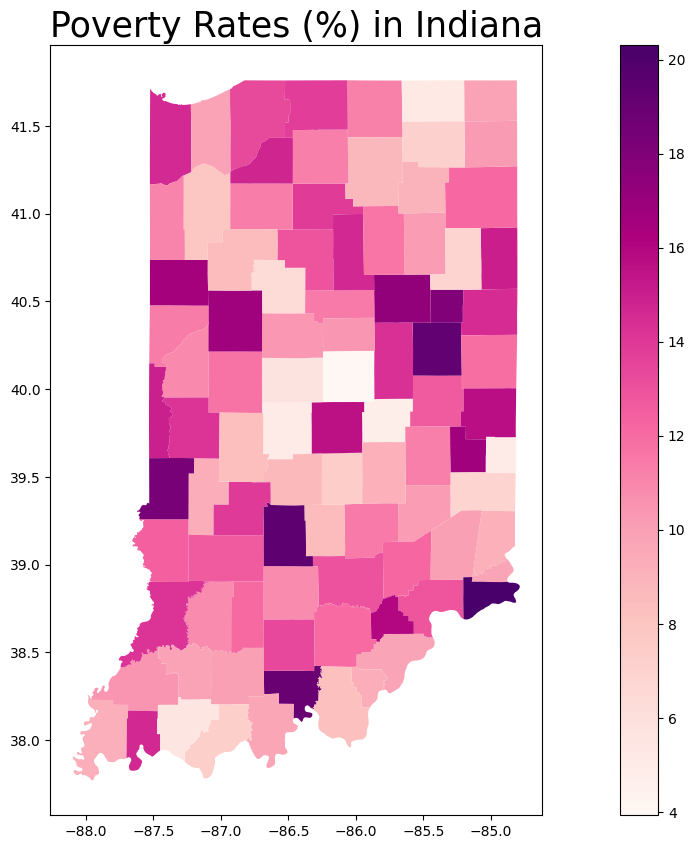

In [26]:
# Create subplots
fig, ax = plt.subplots(1, 1, figsize = (20, 10))

# Plot data
# Source: https://geopandas.readthedocs.io/en/latest/docs/user_guide/mapping.html
in_poverty_county.plot(column = "Poverty_Rate",
                       ax = ax,
                       cmap = "RdPu",
                       legend = True)

# Stylize plots
plt.style.use('bmh')

# Set title
ax.set_title('Poverty Rates (%) in Indiana', fontdict = {'fontsize': '25', 'fontweight' : '3'})

In [27]:
from geopy.geocoders import Nominatim

#find the location of Bloomington to center the plot
address = 'Indianapolis, IN'

geolocator = Nominatim(user_agent="CN_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Indianapolis are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Indianapolis are 39.7683331, -86.1583502.


In [19]:
import plotly.express as px

px.set_mapbox_access_token('pk.eyJ1IjoicGVldmVlNDQiLCJhIjoiY2xwb2pmaTVxMG84aTJxbmpuOTFseWg5NiJ9.l5pZpLYQce5cW7iZyPPX0g')

fig = px.choropleth_mapbox(
    in_poverty_county,
    geojson=in_poverty_county.geometry,
    locations=in_poverty_county.index,
    color='Poverty_Rate',
    range_color=(0, 20),
    color_continuous_scale="Viridis",
    opacity=0.6,
    labels={'Poverty_Rate': 'Poverty rate by County'},
    title='Poverty Rate by County for Indiana',
    # mapbox_style="carto-positron",  # Use a different mapbox style for more detail
    mapbox_style="open-street-map",
    center={"lat": latitude, "lon": longitude},  # Specify the center of your map
    zoom=6,
)
fig.update_layout(margin={"r": 5, "t": 35, "l": 5, "b": 5},
                    height=800,  
                    width=1200,                 
)

# Improve the legend
fig.update_layout(coloraxis_colorbar=dict(
    thicknessmode="pixels", thickness=10,
    lenmode="pixels", len=150,
    yanchor="top", y=0.8,
    ticks="outside",
    dtick=100
))

fig.show()

Now let's reproduce the plotly map for urban and rural population percentages.

In [35]:
urban_2020 = urban_2020.dropna(how='all')
urban_2020['COUNTY']= urban_2020['COUNTY'].apply(lambda x: x.split('.')[0].zfill(3))
urban_2020

,STATE,COUNTY,STATE_NAME,COUNTY_NAME,POP_COU,POPDEN_COU,POP_URB,POPPCT_URB,POP_RUR,POPPCT_RUR
0,1.0,001,Alabama,Autauga,"58,805",98.92,"34,885",59.32%,"23,920",40.68%
1,1.0,003,Alabama,Baldwin,"231,767",145.78,"144,654",62.41%,"87,113",37.59%
2,1.0,005,Alabama,Barbour,"25,223",28.50,"8,596",34.08%,"16,627",65.92%
3,1.0,007,Alabama,Bibb,"22,293",35.81,0,0.00%,"22,293",100.00%
4,1.0,009,Alabama,Blount,"59,134",91.70,"5,624",9.51%,"53,510",90.49%
...,...,...,...,...,...,...,...,...,...,...
3229,72.0,151,Puerto Rico,Yabucoa,"30,426",551.05,"24,925",81.92%,"5,501",18.08%
3230,72.0,153,Puerto Rico,Yauco,"34,172",504.67,"28,084",82.18%,"6,088",17.82%
3231,78.0,010,US Virgin Islands,St. Croix,"41,004",491.86,"38,372",93.58%,"2,632",6.42%
3232,78.0,020,US Virgin Islands,St. John,"3,881",197.10,"2,964",76.37%,917,23.63%


In [39]:
IN_urban_2020 = urban_2020[urban_2020['STATE']==18]
merge_IN = in_poverty_county.merge(IN_urban_2020[['COUNTY','POPPCT_RUR']], how='left', left_on='COUNTYFP', right_on='COUNTY')
merge_IN['POPPCT_RUR'] = pd.to_numeric(merge_IN['POPPCT_RUR'].str.rstrip('%'))
merge_IN.head()

,geometry,C17002_001E,C17002_002E,C17002_003E,B01003_001E,Poverty_Rate,COUNTY,POPPCT_RUR
0,"POLYGON ((-84.80218 40.65755, -84.80214 40.644...",34933.0,2297.0,3057.0,35685.0,15.003503,001,70.84
1,"POLYGON ((-85.22339 40.91698, -85.27018 40.917...",375492.0,19334.0,27019.0,381839.0,12.139410,003,12.92
2,"POLYGON ((-86.07936 39.10483, -86.07985 39.126...",80666.0,4695.0,4675.0,81759.0,11.460512,005,30.69
3,"POLYGON ((-87.17283 40.73671, -87.09839 40.736...",8564.0,595.0,836.0,8687.0,16.472891,007,100.00
4,"POLYGON ((-85.20086 40.47950, -85.20651 40.479...",11982.0,1205.0,977.0,12139.0,17.975122,009,49.35


In [40]:
import plotly.express as px

px.set_mapbox_access_token('pk.eyJ1IjoicGVldmVlNDQiLCJhIjoiY2xwb2pmaTVxMG84aTJxbmpuOTFseWg5NiJ9.l5pZpLYQce5cW7iZyPPX0g')

fig = px.choropleth_mapbox(
    merge_IN,
    geojson=merge_IN.geometry,
    locations=merge_IN.index,
    color='POPPCT_RUR',
    range_color=(0, 100),
    color_continuous_scale="Viridis",
    opacity=0.6,
    labels={'Percentage of population in rural area': 'Rural percentage by County'},
    title='Percentage of the population in rural area by county for Indiana',
    # mapbox_style="carto-positron",  # Use a different mapbox style for more detail
    mapbox_style="open-street-map",
    center={"lat": latitude, "lon": longitude},  # Specify the center of your map
    zoom=6,
)
fig.update_layout(margin={"r": 5, "t": 35, "l": 5, "b": 5},
                    height=800,  
                    width=1200,                 
)

# Improve the legend
fig.update_layout(coloraxis_colorbar=dict(
    thicknessmode="pixels", thickness=10,
    lenmode="pixels", len=150,
    yanchor="top", y=0.8,
    ticks="outside",
    dtick=100
))

fig.show()